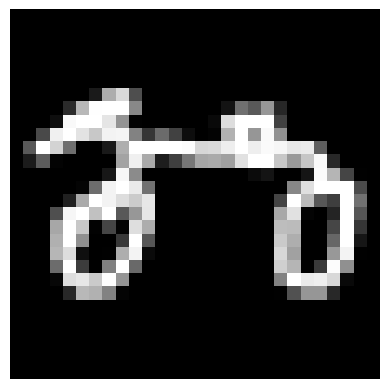

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
array_data = np.load('C:/demo/classfier_cnn/data/full_numpy_bitmap_bicycle.npy')

# Extract the first image
first_image = array_data[16].reshape(28, 28)  # Assuming each image is 28x28 pixels (adjust as per your data)

# Display the first image
plt.imshow(first_image, cmap='gray')
plt.axis('off')  # Optional: turn off axis numbers and ticks
plt.show()


In [2]:
import numpy as np
import os

# List of file paths for the 10 classes

file_paths = [
    'C:/demo/classfier_cnn/data/The Eiffel Tower.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_basketball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_baseball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bathtub.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bicycle.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_apple.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bat.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_alarm clock.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_airplane.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_book.npy'
]

# Function to load and preprocess data
def load_data(file_paths, num_samples=5000):
    data = []
    labels = []
    for idx, file_path in enumerate(file_paths):
        array_data = np.load(file_path)
        # Get the first num_samples samples
        first_samples = array_data[:num_samples]
        data.append(first_samples)
        # Create labels for these samples
        labels.append(np.full((num_samples,), idx))
    return np.vstack(data), np.concatenate(labels)

# Load the data
data, labels = load_data(file_paths)

# Normalize the data
data = data.astype('float32') / 255.0

# Reshape the data if necessary (e.g., if the images are 28x28 pixels)
data = data.reshape(-1, 28, 28, 1)  # Assuming the images are 28x28 pixels and grayscale


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

# List of file paths for the 10 classes
file_paths = [
    'C:/demo/classfier_cnn/data/The Eiffel Tower.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_basketball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_baseball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bathtub.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bicycle.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_apple.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_bat.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_alarm clock.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_airplane.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_book.npy'
]

# Function to load and preprocess data
def load_data(file_paths, num_samples=5000):
    data = []
    labels = []
    for idx, file_path in enumerate(file_paths):
        array_data = np.load(file_path)
        # Get the first num_samples samples
        first_samples = array_data[:num_samples]
        data.append(first_samples)
        # Create labels for these samples
        labels.append(np.full((num_samples,), idx))
    return np.vstack(data), np.concatenate(labels)

# Load the data
data, labels = load_data(file_paths)

# Normalize the data
data = data.astype('float32') / 255.0

# Reshape the data if necessary (e.g., if the images are 28x28 pixels)
data = data.reshape(-1, 28, 28, 1)  # Assuming the images are 28x28 pixels and grayscale

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (40000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (40000,)
y_test shape: (10000,)


In [5]:
y_test
unique_elements = np.unique(y_test)
print(unique_elements)

[0 1 2 3 4 5 6 7 8 9]


In [6]:
# Define the class labels
class_labels = [
    'The Eiffel Tower',
    'full_numpy_bitmap_basketball',
    'full_numpy_bitmap_baseball',
    'full_numpy_bitmap_bathtub',
    'full_numpy_bitmap_bicycle',
    'full_numpy_bitmap_apple',
    'full_numpy_bitmap_bat',
    'full_numpy_bitmap_alarm clock',
    'full_numpy_bitmap_airplane',
    'full_numpy_bitmap_book'
]

# Create the dictionary
class_dict = {i: label for i, label in enumerate(class_labels)}

# Print the dictionary
print(class_dict)

{0: 'The Eiffel Tower', 1: 'full_numpy_bitmap_basketball', 2: 'full_numpy_bitmap_baseball', 3: 'full_numpy_bitmap_bathtub', 4: 'full_numpy_bitmap_bicycle', 5: 'full_numpy_bitmap_apple', 6: 'full_numpy_bitmap_bat', 7: 'full_numpy_bitmap_alarm clock', 8: 'full_numpy_bitmap_airplane', 9: 'full_numpy_bitmap_book'}


In [7]:
X_test.shape

(10000, 28, 28, 1)

In [8]:
X_test_reshaped = np.reshape(X_test, (10000, 1, 28, 28))
X_train_reshaped = np.reshape(X_train, (40000, 1, 28, 28))

# Print the shape after reshaping
print("X_train shape after reshaping:", X_train_reshaped.shape)
print("X_test shape after reshaping:", X_test_reshaped.shape)

X_train shape after reshaping: (40000, 1, 28, 28)
X_test shape after reshaping: (10000, 1, 28, 28)


In [9]:
X_train_reshaped[1].shape

(1, 28, 28)

In [10]:
X_test_reshaped = np.reshape(X_test[9], (1, 28, 28))

# Print the shape after reshaping
print("X_test[9] shape after reshaping:", X_test_reshaped.shape)

X_test[9] shape after reshaping: (1, 28, 28)


In [12]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Assume X_train, y_train, X_test, y_test are already defined as numpy arrays or tensors

# Convert data to tensors if they are numpy arrays
if isinstance(X_train_reshaped, np.ndarray):
    X_train = torch.tensor(X_train, dtype=torch.float32)
if isinstance(y_train, np.ndarray):
    y_train = torch.tensor(y_train, dtype=torch.int64)
if isinstance(X_test_reshaped, np.ndarray):
    X_test = torch.tensor(X_test, dtype=torch.float32)
if isinstance(y_test, np.ndarray):
    y_test = torch.tensor(y_test, dtype=torch.int64)

# Combine data and labels into TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_dataset, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)


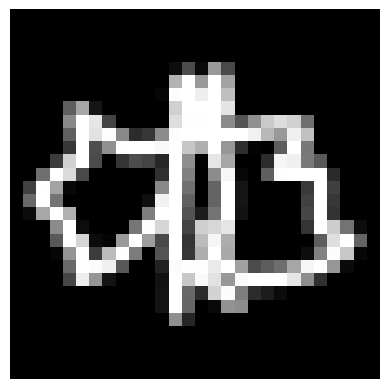

In [13]:
import matplotlib.pyplot as plt
import torch
image_to_plot = X_train[1]  # Assuming you want to plot the second image (index 1)

# Plot the image directly using PyTorch and matplotlib
plt.imshow(image_to_plot.squeeze(0), cmap='gray')  # Squeeze along the channel dimension
plt.axis('off')  # Optional: turn off axis numbers and ticks
plt.show()

In [14]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002DC87B10680>, <torch.utils.data.dataloader.DataLoader object at 0x000002DC08286750>)
Length of train dataloader: 1250 batches of 32
Length of test dataloader: 313 batches of 32


In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 28, 28, 1]), torch.Size([32]))

In [16]:
train_labels_batch

tensor([0, 0, 0, 1, 0, 7, 1, 2, 5, 0, 8, 4, 6, 1, 3, 8, 3, 8, 6, 4, 9, 8, 9, 7,
        7, 7, 3, 9, 3, 9, 8, 8])

In [17]:
class_dict[1]

'full_numpy_bitmap_basketball'

Image size: torch.Size([28, 28, 1])
Label: 8, label size: torch.Size([])


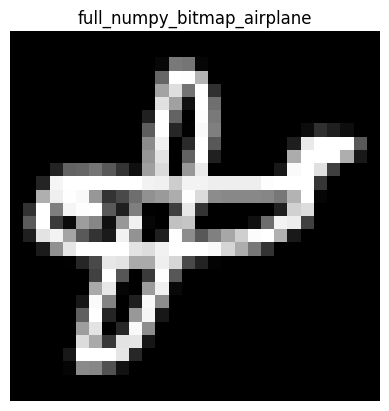

In [18]:
# Show a sample
torch.manual_seed(452)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(0), cmap="gray")
# print(label,'pp')
plt.title(class_dict[label.item()])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")



In [19]:
torch.cuda.is_available()

False

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset

In [70]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([28, 28, 1]) -> [color_channels, height, width]
Shape after flattening: torch.Size([28, 28]) -> [color_channels, height*width]


In [71]:
from torch import nn
class doodle_class_model_02(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [72]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_2 = doodle_class_model_02(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_dict) # one for every class
)
model_2.to("cpu") # keep model on CPU to begin with 

doodle_class_model_02(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [73]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [74]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [75]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [76]:
for batch, (X, y) in enumerate(train_dataloader):
    print(X.shape)
    break

torch.Size([32, 28, 28, 1])


In [77]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 30

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_2.train() 
        # 1. Forward pass
        y_pred = model_2(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_2.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_2(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_2.parameters()).device))

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


  3%|▎         | 1/30 [00:00<00:21,  1.33it/s]

Looked at 38400/40000 samples

Train loss: 1.70738 | Test loss: 1.33266, Test acc: 59.82%

Epoch: 1
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


  7%|▋         | 2/30 [00:01<00:20,  1.39it/s]

Looked at 38400/40000 samples

Train loss: 1.19682 | Test loss: 1.15681, Test acc: 63.11%

Epoch: 2
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 10%|█         | 3/30 [00:02<00:18,  1.42it/s]

Looked at 38400/40000 samples

Train loss: 1.09591 | Test loss: 1.10516, Test acc: 64.55%

Epoch: 3
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 13%|█▎        | 4/30 [00:02<00:17,  1.45it/s]

Looked at 38400/40000 samples

Train loss: 1.05320 | Test loss: 1.07620, Test acc: 64.85%

Epoch: 4
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 17%|█▋        | 5/30 [00:03<00:17,  1.39it/s]

Looked at 38400/40000 samples

Train loss: 1.02609 | Test loss: 1.05690, Test acc: 65.37%

Epoch: 5
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples
Looked at 38400/40000 samples


 20%|██        | 6/30 [00:04<00:17,  1.40it/s]


Train loss: 1.00734 | Test loss: 1.04347, Test acc: 65.94%

Epoch: 6
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 23%|██▎       | 7/30 [00:04<00:16,  1.40it/s]

Looked at 38400/40000 samples

Train loss: 0.99291 | Test loss: 1.03770, Test acc: 66.29%

Epoch: 7
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples
Looked at 38400/40000 samples


 27%|██▋       | 8/30 [00:05<00:15,  1.38it/s]


Train loss: 0.98093 | Test loss: 1.02566, Test acc: 66.41%

Epoch: 8
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples
Looked at 38400/40000 samples


 30%|███       | 9/30 [00:06<00:15,  1.39it/s]


Train loss: 0.97024 | Test loss: 1.02264, Test acc: 66.08%

Epoch: 9
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 33%|███▎      | 10/30 [00:07<00:14,  1.38it/s]

Looked at 38400/40000 samples

Train loss: 0.96078 | Test loss: 1.01385, Test acc: 66.47%

Epoch: 10
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples
Looked at 38400/40000 samples


 37%|███▋      | 11/30 [00:07<00:13,  1.38it/s]


Train loss: 0.95356 | Test loss: 1.00486, Test acc: 66.98%

Epoch: 11
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 40%|████      | 12/30 [00:08<00:13,  1.38it/s]

Looked at 38400/40000 samples

Train loss: 0.94648 | Test loss: 0.99812, Test acc: 67.45%

Epoch: 12
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 43%|████▎     | 13/30 [00:09<00:12,  1.38it/s]

Looked at 38400/40000 samples

Train loss: 0.93951 | Test loss: 0.99558, Test acc: 67.56%

Epoch: 13
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 47%|████▋     | 14/30 [00:10<00:11,  1.38it/s]

Looked at 38400/40000 samples

Train loss: 0.93393 | Test loss: 0.99126, Test acc: 67.10%

Epoch: 14
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples
Looked at 38400/40000 samples


 50%|█████     | 15/30 [00:10<00:11,  1.36it/s]


Train loss: 0.92851 | Test loss: 0.98647, Test acc: 67.77%

Epoch: 15
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 53%|█████▎    | 16/30 [00:11<00:10,  1.38it/s]

Looked at 38400/40000 samples

Train loss: 0.92348 | Test loss: 0.98517, Test acc: 67.83%

Epoch: 16
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 57%|█████▋    | 17/30 [00:12<00:09,  1.36it/s]

Looked at 38400/40000 samples

Train loss: 0.91871 | Test loss: 0.98219, Test acc: 67.73%

Epoch: 17
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 60%|██████    | 18/30 [00:13<00:08,  1.36it/s]

Looked at 38400/40000 samples

Train loss: 0.91354 | Test loss: 0.98399, Test acc: 67.65%

Epoch: 18
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples
Looked at 38400/40000 samples


 63%|██████▎   | 19/30 [00:13<00:08,  1.37it/s]


Train loss: 0.90948 | Test loss: 0.97802, Test acc: 68.06%

Epoch: 19
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 67%|██████▋   | 20/30 [00:14<00:07,  1.35it/s]

Looked at 38400/40000 samples

Train loss: 0.90528 | Test loss: 0.97421, Test acc: 67.94%

Epoch: 20
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 70%|███████   | 21/30 [00:15<00:06,  1.35it/s]

Looked at 38400/40000 samples

Train loss: 0.90135 | Test loss: 0.97211, Test acc: 68.03%

Epoch: 21
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 73%|███████▎  | 22/30 [00:15<00:05,  1.36it/s]

Looked at 38400/40000 samples

Train loss: 0.89732 | Test loss: 0.96646, Test acc: 68.23%

Epoch: 22
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples
Looked at 38400/40000 samples


 77%|███████▋  | 23/30 [00:16<00:05,  1.33it/s]


Train loss: 0.89328 | Test loss: 0.97419, Test acc: 67.83%

Epoch: 23
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 80%|████████  | 24/30 [00:17<00:04,  1.34it/s]

Looked at 38400/40000 samples

Train loss: 0.88941 | Test loss: 0.96988, Test acc: 67.93%

Epoch: 24
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples
Looked at 38400/40000 samples


 83%|████████▎ | 25/30 [00:18<00:03,  1.36it/s]


Train loss: 0.88651 | Test loss: 0.97250, Test acc: 67.30%

Epoch: 25
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 87%|████████▋ | 26/30 [00:18<00:02,  1.35it/s]

Looked at 38400/40000 samples

Train loss: 0.88350 | Test loss: 0.95762, Test acc: 68.65%

Epoch: 26
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples
Looked at 38400/40000 samples


 90%|█████████ | 27/30 [00:19<00:02,  1.36it/s]


Train loss: 0.87968 | Test loss: 0.97616, Test acc: 67.29%

Epoch: 27
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


 93%|█████████▎| 28/30 [00:20<00:01,  1.35it/s]

Looked at 38400/40000 samples

Train loss: 0.87655 | Test loss: 0.95403, Test acc: 68.66%

Epoch: 28
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples
Looked at 38400/40000 samples


 97%|█████████▋| 29/30 [00:21<00:00,  1.36it/s]


Train loss: 0.87328 | Test loss: 0.95392, Test acc: 68.40%

Epoch: 29
-------
Looked at 0/40000 samples
Looked at 12800/40000 samples
Looked at 25600/40000 samples


100%|██████████| 30/30 [00:21<00:00,  1.37it/s]

Looked at 38400/40000 samples

Train loss: 0.87060 | Test loss: 0.95269, Test acc: 68.38%

Train time on cpu: 21.941 seconds


In [68]:
next(model_2.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)

In [78]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_2, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'doodle_class_model_02',
 'model_loss': 0.9526905417442322,
 'model_acc': 68.3805910543131}

In [79]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import numpy as np

class DoodleClassModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=input_shape, out_features=hidden_units), 
            nn.ReLU(),
            nn.BatchNorm1d(hidden_units),
            nn.Dropout(0.5),
            nn.Linear(in_features=hidden_units, out_features=hidden_units*2),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_units*2),
            nn.Dropout(0.5),
            nn.Linear(in_features=hidden_units*2, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

# Define accuracy function
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    return (correct / len(y_true)) * 100

torch.manual_seed(42)

# Instantiate the model
model_2 = DoodleClassModel(input_shape=784, hidden_units=128, output_shape=len(class_dict))
model_2.to("cpu")

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Data loading (assuming train_dataloader and test_dataloader are defined)
epochs = 30

# Training loop
for epoch in tqdm(range(epochs)):
    model_2.train()
    train_loss = 0
    for X, y in train_dataloader:
        X, y = X.to("cpu"), y.to("cpu")

        optimizer.zero_grad()
        y_pred = model_2(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    
    scheduler.step()

    train_loss /= len(train_dataloader)
    
    # Evaluation
    model_2.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to("cpu"), y.to("cpu")
            test_pred = model_2(X)
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
    
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

print("Training Complete")


  3%|▎         | 1/30 [00:03<01:27,  3.01s/it]

Epoch 1/30 | Train Loss: 1.0201 | Test Loss: 0.7484 | Test Acc: 76.49%


  7%|▋         | 2/30 [00:06<01:24,  3.01s/it]

Epoch 2/30 | Train Loss: 0.8631 | Test Loss: 0.6945 | Test Acc: 78.05%


 10%|█         | 3/30 [00:09<01:23,  3.10s/it]

Epoch 3/30 | Train Loss: 0.8121 | Test Loss: 0.6578 | Test Acc: 78.73%


 13%|█▎        | 4/30 [00:12<01:19,  3.06s/it]

Epoch 4/30 | Train Loss: 0.7771 | Test Loss: 0.6329 | Test Acc: 79.67%


 17%|█▋        | 5/30 [00:15<01:17,  3.11s/it]

Epoch 5/30 | Train Loss: 0.7551 | Test Loss: 0.6193 | Test Acc: 79.81%


 20%|██        | 6/30 [00:18<01:15,  3.13s/it]

Epoch 6/30 | Train Loss: 0.7274 | Test Loss: 0.6002 | Test Acc: 80.66%


 23%|██▎       | 7/30 [00:21<01:12,  3.16s/it]

Epoch 7/30 | Train Loss: 0.7086 | Test Loss: 0.5871 | Test Acc: 81.05%


 27%|██▋       | 8/30 [00:24<01:09,  3.15s/it]

Epoch 8/30 | Train Loss: 0.7037 | Test Loss: 0.5855 | Test Acc: 81.00%


 30%|███       | 9/30 [00:28<01:06,  3.15s/it]

Epoch 9/30 | Train Loss: 0.6903 | Test Loss: 0.5785 | Test Acc: 81.70%


 33%|███▎      | 10/30 [00:31<01:03,  3.17s/it]

Epoch 10/30 | Train Loss: 0.6754 | Test Loss: 0.5707 | Test Acc: 81.31%


 37%|███▋      | 11/30 [00:34<01:00,  3.18s/it]

Epoch 11/30 | Train Loss: 0.6367 | Test Loss: 0.5565 | Test Acc: 82.13%


 40%|████      | 12/30 [00:37<00:56,  3.12s/it]

Epoch 12/30 | Train Loss: 0.6238 | Test Loss: 0.5548 | Test Acc: 82.01%


 43%|████▎     | 13/30 [00:40<00:53,  3.13s/it]

Epoch 13/30 | Train Loss: 0.6236 | Test Loss: 0.5492 | Test Acc: 82.35%


 47%|████▋     | 14/30 [00:43<00:49,  3.12s/it]

Epoch 14/30 | Train Loss: 0.6188 | Test Loss: 0.5441 | Test Acc: 82.44%


 50%|█████     | 15/30 [00:46<00:46,  3.12s/it]

Epoch 15/30 | Train Loss: 0.6094 | Test Loss: 0.5413 | Test Acc: 82.63%


 53%|█████▎    | 16/30 [00:49<00:43,  3.11s/it]

Epoch 16/30 | Train Loss: 0.6064 | Test Loss: 0.5413 | Test Acc: 82.57%


 57%|█████▋    | 17/30 [00:53<00:40,  3.13s/it]

Epoch 17/30 | Train Loss: 0.6048 | Test Loss: 0.5419 | Test Acc: 82.43%


 60%|██████    | 18/30 [00:56<00:37,  3.12s/it]

Epoch 18/30 | Train Loss: 0.6000 | Test Loss: 0.5379 | Test Acc: 82.69%


 63%|██████▎   | 19/30 [00:59<00:34,  3.11s/it]

Epoch 19/30 | Train Loss: 0.5948 | Test Loss: 0.5361 | Test Acc: 82.56%


 67%|██████▋   | 20/30 [01:02<00:31,  3.10s/it]

Epoch 20/30 | Train Loss: 0.5984 | Test Loss: 0.5346 | Test Acc: 82.74%


 70%|███████   | 21/30 [01:05<00:27,  3.11s/it]

Epoch 21/30 | Train Loss: 0.5859 | Test Loss: 0.5369 | Test Acc: 82.74%


 73%|███████▎  | 22/30 [01:08<00:25,  3.14s/it]

Epoch 22/30 | Train Loss: 0.5886 | Test Loss: 0.5356 | Test Acc: 82.75%


 77%|███████▋  | 23/30 [01:11<00:22,  3.14s/it]

Epoch 23/30 | Train Loss: 0.5884 | Test Loss: 0.5368 | Test Acc: 82.76%


 80%|████████  | 24/30 [01:15<00:18,  3.16s/it]

Epoch 24/30 | Train Loss: 0.5846 | Test Loss: 0.5360 | Test Acc: 82.74%


 83%|████████▎ | 25/30 [01:18<00:15,  3.11s/it]

Epoch 25/30 | Train Loss: 0.5860 | Test Loss: 0.5358 | Test Acc: 82.70%


 87%|████████▋ | 26/30 [01:21<00:12,  3.08s/it]

Epoch 26/30 | Train Loss: 0.5882 | Test Loss: 0.5338 | Test Acc: 82.88%


 90%|█████████ | 27/30 [01:24<00:09,  3.11s/it]

Epoch 27/30 | Train Loss: 0.5889 | Test Loss: 0.5353 | Test Acc: 82.79%


 93%|█████████▎| 28/30 [01:27<00:06,  3.11s/it]

Epoch 28/30 | Train Loss: 0.5877 | Test Loss: 0.5350 | Test Acc: 82.58%


 97%|█████████▋| 29/30 [01:30<00:03,  3.13s/it]

Epoch 29/30 | Train Loss: 0.5860 | Test Loss: 0.5356 | Test Acc: 82.72%


100%|██████████| 30/30 [01:33<00:00,  3.13s/it]

Epoch 30/30 | Train Loss: 0.5833 | Test Loss: 0.5328 | Test Acc: 82.75%
Training Complete


In [80]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_2, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'DoodleClassModel',
 'model_loss': 0.532804548740387,
 'model_acc': 82.74760383386581}

In [81]:
next(model_2.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0195,  0.0034,  0.0302,  ..., -0.0030, -0.0317,  0.0128],
        [-0.0107,  0.0221, -0.0158,  ..., -0.0121,  0.0042,  0.0318],
        [-0.0106,  0.0342,  0.0240,  ...,  0.0091,  0.0174,  0.0041]],
       requires_grad=True)

In [40]:
model_0.eval()

doodle_class(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [42]:
torch.save(model_0.state_dict(), 'mod01.pth')

In [45]:
X_train[1].shape

torch.Size([28, 28, 1])

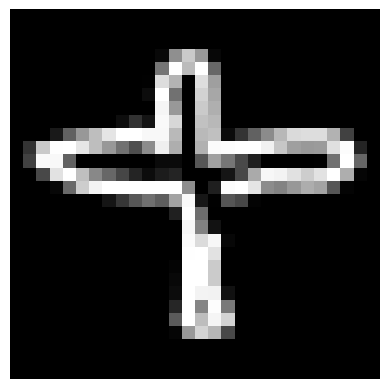

In [89]:
from PIL import Image
import torchvision.transforms as transforms

# Load the sample image
# sample_image_path = 'path_to_your_sample_image.jpg'  # Replace with your actual image path
# sample_image = Image.open(sample_image_path)

array_data = np.load('C:/demo/classfier_cnn/data/full_numpy_bitmap_airplane.npy')
# Extract the first image
input_tensor = array_data[6].reshape(28, 28,1)

# Display the first image
plt.imshow(input_tensor, cmap='gray')
plt.axis('off')  # Optional: turn off axis numbers and ticks
plt.show()


In [83]:
input_tensor.shape

(28, 28, 1)

In [84]:
def preprocess_sample_image(image_array):
    # Normalize the image
    image_array = image_array.astype('float32') / 255.0
    # Reshape the image to (1, 28, 28, 1) if it's a single image
    image_array = np.reshape(image_array, (1, 1, 28, 28))
    # Convert to torch tensor
    image_tensor = torch.tensor(image_array, dtype=torch.float32)
    # Flatten the image tensor to shape (1, 784)
    image_tensor = image_tensor.view(1, -1)
    return image_tensor


In [90]:
# Preprocess the sample image
sample_image_tensor = preprocess_sample_image(input_tensor)

# Make a prediction with the loaded model
with torch.no_grad():
    output = model_2(sample_image_tensor)
    predicted_class = torch.argmax(output, dim=1).item()

# Print the predicted class

print(f"Predicted class label: {class_dict[predicted_class]}")
print(f"Predicted class index: {predicted_class}")

Predicted class label: full_numpy_bitmap_airplane
Predicted class index: 8


In [187]:
def preprocess_sample_image(image_array):
    # Normalize the image
    image_array = image_array.astype('float32') / 255.0
    # Reshape the image to (1, 28, 28, 1) if it's a single image
    image_array = np.reshape(image_array, (1, 1, 28, 28))
    # Convert to torch tensor
    image_tensor = torch.tensor(image_array, dtype=torch.float32)
    # Flatten the image tensor to shape (1, 784)
    image_tensor = image_tensor.view(1, -1)
    return image_tensor

In [ ]:
###################################################################################

In [10]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = CNNModel()


In [11]:
np.shape(labels)

(50000,)

In [12]:
import numpy as np

# Assume data and labels are already loaded as numpy arrays
# data: shape (num_samples, 28, 28)
# labels: shape (num_samples,)

# Normalize data
data = data.astype('float32') / 255.0
data = data.reshape(-1, 1, 28, 28)  # PyTorch expects (batch_size, channels, height, width)

# Convert labels to tensor
labels = torch.from_numpy(labels).long()

# Create dataset and dataloader
dataset = TensorDataset(torch.from_numpy(data), labels)
train_loader = DataLoader(dataset, batch_size=128, shuffle=True)


RuntimeError: Numpy is not available

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from torchvision import transforms

class ImageDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Dummy data for demonstration purposes
num_samples = 10000
data = np.random.rand(num_samples, 28, 28).astype('float32')
labels = np.random.randint(0, 10, num_samples)

# Define any transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

# Create dataset and dataloader
dataset = ImageDataset(data, labels, transform=transform)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Iterate over the DataLoader and print the shapes and some values
for images, labels in data_loader:
    print(f"Batch image shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
    print(f"Sample image data: {images[0]}")
    print(f"Sample label: {labels[0]}")
    break  # Just to print the first batch and stop


RuntimeError: Numpy is not available

In [46]:
import torch
print(torch.__version__)


2.3.1+cpu


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

# Define a custom dataset class for our data
class ImageDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Define a CNN model architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv3 = nn.Conv2d(20, 30, kernel_size=5)
        self.fc1 = nn.Linear(30*4*4, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv3(x), 2))
        x = x.view(-1, 30*4*4)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Set the device (GPU or CPU)
device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Create a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create a dataset and data loader for our data
dataset = ImageDataset(data, labels, transform=transform)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Create an instance of the CNN model
model = Net()

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, (images, labels) in enumerate(data_loader):
        # Get the inputs and labels
        images, labels = images.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update the model parameters
        optimizer.step()

        # Print the loss at each batch
        running_loss += loss.item()
        if i % 10 == 9:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

print('Finished Training')

RuntimeError: Numpy is not available

In [22]:
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, (images, labels) in enumerate(data_loader):
        # Get the inputs and labels
        images, labels = images.to(device), labels.to(device)


RuntimeError: Numpy is not available

In [15]:
device

'cpu'